## Profitable App Profiles for the App Store and Google Play Markets

The goal of the following project is to bring information regarding mobile app profiles to our company's developers for decision making purposes. The apps should be profitable on both App Store and Google Play markets. 
Our company creates apps that are free to download and install and its main revenue comes from in-app ads. The number of users infuences our revenues, so we want to answer the question which apps are likely to attract most users.

We decided to analyze a sample of data, as there are about four millions iOS and Android apps (too much time and money needed to collect that big amount of data). We were lucky to find data sets at no cost: a data set containing data about approximately ten thousand Android apps from Google Play and a data set containing data about approximately seven thousand iOS apps from the App Store.

We will start by opening the two data sets and then continue with exploring the data.

In [1]:
from csv import reader 

### Opening App Store data set ###
opened_file = open('C:\\Users\\malgo\\OneDrive\\Pulpit\\DataQuest\\apple-apps-master\\AppleStore.csv', encoding='utf8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

### Opening Google Play data set ###
opened_file = open('C:\\Users\\malgo\\OneDrive\\Pulpit\\DataQuest\\google-play-store-apps\\googleplaystore.csv', encoding='utf8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

To make it easier to explore the two data sets, we'll first write a function named *explore_data()* that we can use repeatedly to explore rows in a more readable way. We'll also add an option for our function to show the number of rows and columns for any data set.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
        
    if rows_and_columns:
            print('Number of rows is:', len(dataset))
            print('Number of columns is:', len(dataset[0]))

In [3]:
print(ios_header)
print('\n')
explore_data(ios, 0, 4, True)

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['4', '282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


Number of rows is: 7197
Number of columns is: 17


We have more than 7000 iOS apps in this data set. The columns that seem interesting for our analysis are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver' and 'prime_genre'. Information about each column can be found in data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

In [4]:
print(android_header)
print('\n')
explore_data(android, 0, 4, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows is: 10841
Number of columns is: 13


The Google Play data set contains over ten thousand rows and thirteen columns. Most important columns for our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price' and 'Genres'.

# Cleaning Data

## Deleting Inaccurate Entry
In order to analyse our data and bring reliable information for our company managers, we will clean the data, removing or correcting inaccurate data.

There is a discussion on [**kaggle**](https://www.kaggle.com/lava18/google-play-store-apps/discussion) regarding the Google Play data set. One of the [entries](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) is possibly incorrect.

In [5]:
print(android[10472])
print('\n')
print(android_header) # header
print('\n')
print(android[0]) # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Indeed, the category of the above *Life Made WI-Fi Touchscreen Photo Frame* row is missing. We will delete that row.

In [6]:
print(len(android))
del android[10472]  
print(len(android))

10841
10840


## Duplicate Entries Removal

### Part One

In the discussion paper mentioned before, we can also encounter information about duplicate entries. In order to find any duplicate apps, we will create two lists (one containing unique app's names and another for duplicates) and loop through the data set.

In [7]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


As we can see above, there are over thousand duplicates in our data set. We could just delete them to keep one entry for an app but before we do it, it makes sense to look at number of reviews and keep the entries with highest number of them (the newest ones).

We will create a dictionary in which key is a unique app name and the value is the highest number of reviews of that app. The next step will be to create a data set with only one entry per app.

In [8]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and n_reviews > reviews_max[name]:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews


In [9]:
print(('Expected length:'), len(android) - 1181)
print(('Actual length:'), len(reviews_max))

Expected length: 9659
Actual length: 9659


Thanks to `reviews_max` dictionary we can start removing duplicates, keeping data entries with the highest number of reviews. First step will be to create two empty lists, one for data with unique entries (`android_clean`), another for duplicate cases (`already_added`). What is more, we will loop through the Google Play data set and fill the lists. 

However, `reviews_max` still contains some duplicates (when highest number of reviews of a duplicate app is the same for more than one entry). To avoid these duplicates we will build a condition where number of reviews must be equal to the values in `reviews_max` and name of the app must not be in `already_added`.

In [10]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

In [11]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows is: 9659
Number of columns is: 13


We have 9659 rows, just as expected.

## Removing Non-English Apps

### Part One

While exploring data sets, we found out that some of the apps are not directed toward an English-speaking audience. Examples are presented below:

In [12]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

436672029
1144164707
中国語 AQリスニング
لعبة تقدر تربح DZ


We are intrested in keeping only apps directed to English-speaking audience. Our goal is to remove unwanted entries. We will find out which entries are right based on characters that are specific to English texts using ASCII standard.  

The below function will help us to find out the corresponding encoding number of each character.

In [13]:
def is_english(string):
    
    for character in string:
        if ord(character) > 127:
            return False
    
    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


Emojis and some other characters are sometimes used in English app names.  

In [14]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


### Part two

To keep English entries containing emojis and some other characters, we will remove only those apps that have more than three non-ASCII characters.

In [15]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


As the next step we will use is_english() function filter out the non-English apps for both data sets:

In [16]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[2]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows is: 9614
Number of columns is: 13


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0'

## Isolating Free Apps

As we already mentioned in the introduction, we build apps that are free to download and install. Our main source of revenue consists of in-app ads. The case is that our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [17]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[5]
    if price == '0':
        ios_final.append(app)
        
print('Final length of the Google Play data set: ', len(android_final))
print('Final length of the App Store data set: ', len(ios_final))

Final length of the Google Play data set:  8864
Final length of the App Store data set:  3222


# Data Analysis

## Most Common Apps by Genre

### Part One

Our revenue is highly influenced by the number of people using our apps. We will try to determine what kinds of apps are likely to attract more users.

We developed a validation strategy for an app, which is comprised of three steps:
1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users - develop it further.
3. If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Our end goal is to add the app on both the Google Play and App Store. We need to find app profiles that are successful on both markets. For example, a profile that may work well for both markets may be a productivity app that makes use of gamification.

We wil start the analysis by getting a sense of the most common genres for each market. We'll build a frequency table for the `prime_genre` column of the App Store data set, and the Genres and Category columns of the Google Play data set.

### Part Two

In this part we will build two functions, which will help us analyze the frequency tables. The first function will be to generate frequency tables and show percentages. The second one will display the percentages in a descending order.

In [18]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
            
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = [percentage]
        
    return table_percentages

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Part three

We will begin to analyze the frequency table for the `prime_genre` column of the App Store data set.

In [19]:
display_table(ios_final, -5) # Prime Genre

Games : [58.16263190564867]
Entertainment : [7.883302296710118]
Photo & Video : [4.9658597144630665]
Education : [3.662321539416512]
Social Networking : [3.2898820608317814]
Shopping : [2.60707635009311]
Utilities : [2.5139664804469275]
Sports : [2.1415270018621975]
Music : [2.0484171322160147]
Health & Fitness : [2.0173805090006205]
Productivity : [1.7380509000620732]
Lifestyle : [1.5828677839851024]
News : [1.3345747982619491]
Travel : [1.2414649286157666]
Finance : [1.1173184357541899]
Weather : [0.8690254500310366]
Food & Drink : [0.8069522036002483]
Reference : [0.5586592178770949]
Business : [0.5276225946617008]
Book : [0.4345127250155183]
Navigation : [0.186219739292365]
Medical : [0.186219739292365]
Catalogs : [0.12414649286157665]


The most common type of app in the App Store data set (concerning the free English apps) are games (58, 16% - more than a half of all apps). On the next positions we can find entertainment (almost 8%) and photo and video (almost 5%) apps. Other types of apps are not so numerous.

We can get an impression, that App Store is dominated by apps designed for fun (games, entertainment, photo and video). It seems to be that practical apps are more rare. However, the number of apps in data set might not be enough to make to far conclusions. The demand might not be the same as the offer.

For now, let's continue the analysis of the Genres and Category columns of the Google Play data set (two columns which seem to be related).

In [20]:
display_table(android_final, 1) # Category

FAMILY : [18.907942238267147]
GAME : [9.724729241877256]
TOOLS : [8.461191335740072]
BUSINESS : [4.591606498194946]
LIFESTYLE : [3.9034296028880866]
PRODUCTIVITY : [3.892148014440433]
FINANCE : [3.7003610108303246]
MEDICAL : [3.531137184115524]
SPORTS : [3.395758122743682]
PERSONALIZATION : [3.3167870036101084]
COMMUNICATION : [3.2378158844765346]
HEALTH_AND_FITNESS : [3.0798736462093865]
PHOTOGRAPHY : [2.944494584837545]
NEWS_AND_MAGAZINES : [2.7978339350180503]
SOCIAL : [2.6624548736462095]
TRAVEL_AND_LOCAL : [2.33528880866426]
SHOPPING : [2.2450361010830324]
BOOKS_AND_REFERENCE : [2.1435018050541514]
DATING : [1.861462093862816]
VIDEO_PLAYERS : [1.7937725631768955]
MAPS_AND_NAVIGATION : [1.3989169675090252]
FOOD_AND_DRINK : [1.2409747292418771]
EDUCATION : [1.1620036101083033]
ENTERTAINMENT : [0.9589350180505415]
LIBRARIES_AND_DEMO : [0.9363718411552346]
AUTO_AND_VEHICLES : [0.9250902527075812]
HOUSE_AND_HOME : [0.8235559566787004]
WEATHER : [0.8009927797833934]
EVENTS : [0.71074007

While examing the Google Play data set according to category of app, we notice that not as many apps (comparing to the App Store data set) are designed for fun. The most numerous are family apps (almost 19%), followed by games (almost 10%) and tools (about 8%). However, if we investigate this further, we can see that the family category means mostly games for kids.

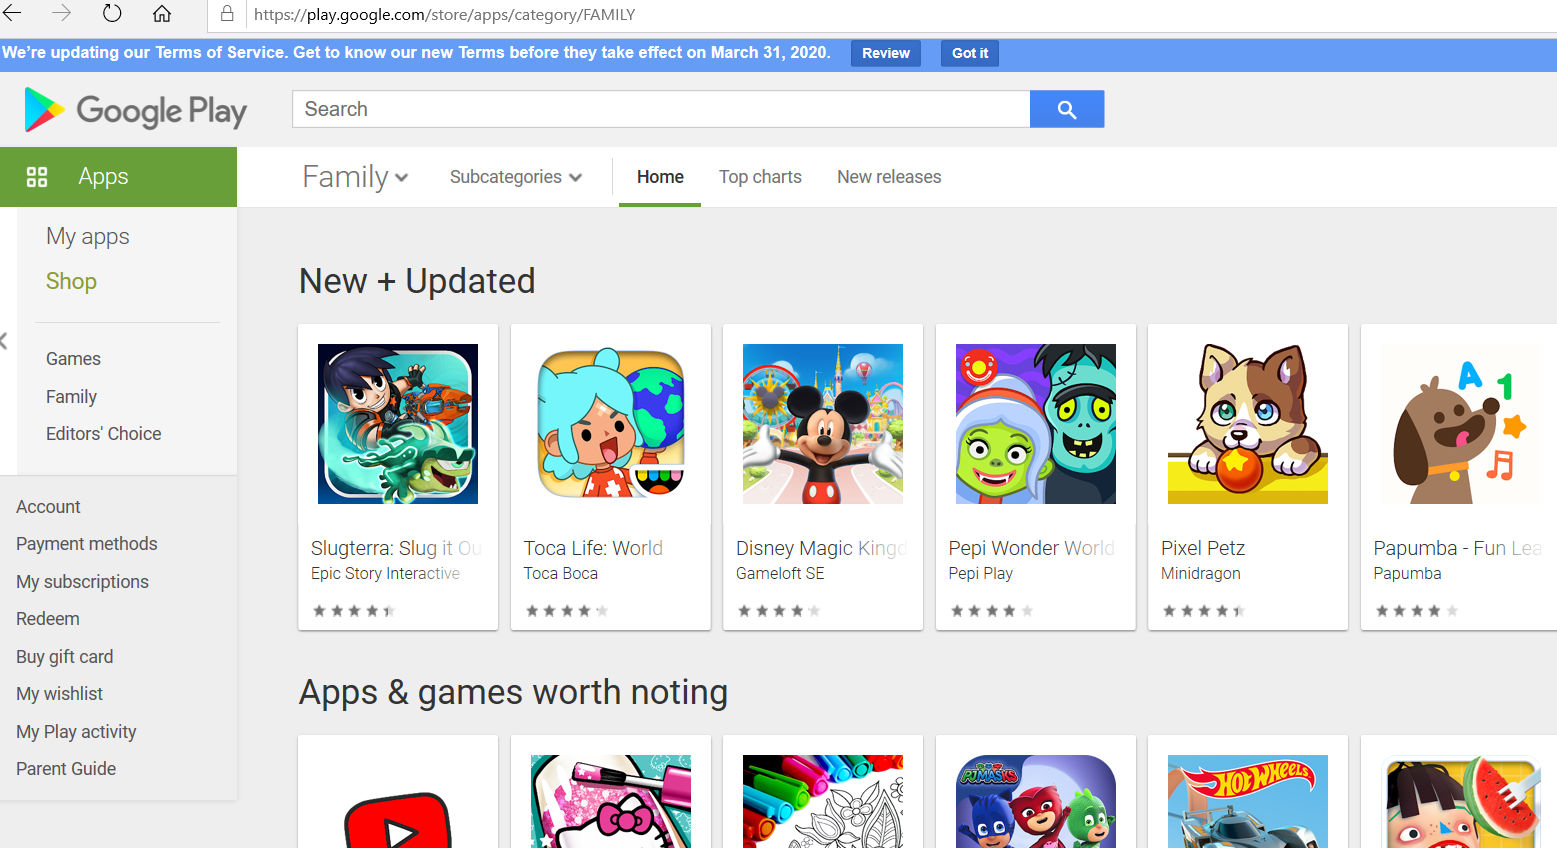

Nevertheless, practical apps (tools, business, lifestyle) seem to have a better representation on the Google Play in comparison to the App Store. The relation of apps is confirmed by the frequency table for Genres column:

In [21]:
display_table(android_final, -4) # Genres

Tools : [8.449909747292418]
Entertainment : [6.069494584837545]
Education : [5.347472924187725]
Business : [4.591606498194946]
Productivity : [3.892148014440433]
Lifestyle : [3.892148014440433]
Finance : [3.7003610108303246]
Medical : [3.531137184115524]
Sports : [3.463447653429603]
Personalization : [3.3167870036101084]
Communication : [3.2378158844765346]
Action : [3.1024368231046933]
Health & Fitness : [3.0798736462093865]
Photography : [2.944494584837545]
News & Magazines : [2.7978339350180503]
Social : [2.6624548736462095]
Travel & Local : [2.3240072202166067]
Shopping : [2.2450361010830324]
Books & Reference : [2.1435018050541514]
Simulation : [2.0419675090252705]
Dating : [1.861462093862816]
Arcade : [1.8501805054151623]
Video Players & Editors : [1.7712093862815883]
Casual : [1.7599277978339352]
Maps & Navigation : [1.3989169675090252]
Food & Drink : [1.2409747292418771]
Puzzle : [1.128158844765343]
Racing : [0.9927797833935018]
Role Playing : [0.9363718411552346]
Libraries & D

The difference between the Genres and the Category columns is not completely  clear. However, we can notice that the Genres column has more categories. 

After this initial analysis we can find out that while Google Play shows a more balanced landscape of both practical and for-fun apps, the App Store is dominated by apps built for fun. Our next step will be to get to know the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

To find out what genres are the most popular among users, we will calculate the average number of installs for each app genre. In the Google Play data set, this information in represented in the Installs column, but for the App Store data set this information is missing. We decided to take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [22]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for row in ios_final:
        genre_app = row[-5]
        if genre_app == genre:
            n_ratings = float(row[6])
            total += n_ratings
            len_genre += 1
    avg_n_raitings = (total / len_genre)
    print(genre, ':', avg_n_raitings)

Productivity : 21028.410714285714
Weather : 52279.892857142855
Shopping : 26919.690476190477
Reference : 74942.11111111111
Finance : 31467.944444444445
Music : 57326.530303030304
Utilities : 18684.456790123455
Travel : 28243.8
Social Networking : 71548.34905660378
Sports : 23008.898550724636
Health & Fitness : 23298.015384615384
Games : 22788.6696905016
Food & Drink : 33333.92307692308
News : 21248.023255813954
Book : 39758.5
Photo & Video : 28441.54375
Entertainment : 14029.830708661417
Business : 7491.117647058823
Lifestyle : 16485.764705882353
Education : 7003.983050847458
Navigation : 86090.33333333333
Medical : 612.0
Catalogs : 4004.0


Genres with the highest average user raitings in the App Store are navigation, social networking and reference. 

In [23]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[2], ':', app[6]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Geocaching® : 12811
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5
CoPilot GPS – Car Navigation & Offline Maps : 3582
Google Maps - Navigation & Transit : 154911


In navigation group we can notice that most raitings are for Wase and Google Maps. Let's investigate also social networking genre.

In [24]:
for app in ios_final:
    if app[-5] == 'Social Networking':
        print(app[2], ':', app[6]) # print name and number of ratings

Facebook : 2974676
LinkedIn : 71856
Skype for iPhone : 373519
Tumblr : 334293
Match™ - #1 Dating App. : 60659
WhatsApp Messenger : 287589
TextNow - Unlimited Text + Calls : 164963
Grindr - Gay and same sex guys chat, meet and date : 23201
imo video calls and chat : 18841
Ameba : 269
Weibo : 7265
Badoo - Meet New People, Chat, Socialize. : 34428
Kik : 260965
Qzone : 1649
Fake-A-Location Free ™ : 354
Tango - Free Video Call, Voice and Chat : 75412
MeetMe - Chat and Meet New People : 97072
SimSimi : 23530
Viber Messenger – Text & Call : 164249
Find My Family, Friends & iPhone - Life360 Locator : 43877
Weibo HD : 16772
POF - Best Dating App for Conversations : 52642
GroupMe : 28260
Lobi : 36
WeChat : 34584
ooVoo – Free Video Call, Text and Voice : 177501
Pinterest : 1061624
知乎 : 397
Qzone HD : 458
Skype for iPad : 60163
LINE : 11437
QQ : 9109
LOVOO - Dating Chat : 1985
QQ HD : 5058
Messenger : 351466
eHarmony™ Dating App - Meet Singles : 11124
YouNow: Live Stream Video Chat : 12079
Cougar 

In Social Networking genre the raitings are also spread unevenly. Most raitings has Facebook. If we tried to create an app similar to Facebook we would most probably fail because people are get used to one social networking app and it takes quite much time for users to decide to use something else. 

Creation of gaming app could not be successful because the market seems to be a bit saturated with for-fun apps. We would rather try some practical app, maybe a book.

In [25]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[2], ':', app[6]) # print name and number of ratings

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
Merriam-Webster Dictionary : 16849
Google Translate : 26786
Night Sky : 12122
WWDC : 762
Jishokun-Japanese English Dictionary & Translator : 0
教えて!goo : 0
VPN Express : 14
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Real Bike Traffic Rider Virtual Reality Glasses : 8


For example we could create an app that would include daily quotes from the book, an audio version of the book, quizzes about the book, etc. We would choose a popular book like Bible. 

We also considered weather app, however we found out that people do not spend much time on that kind of apps (we would not profit much from in-app adds). We thought also about a finance app, but although it could be useful and may attract users, it would require hiring a finance expert (that we want to avoid).

## Most popular Apps by Genre on the Google Play

When it comes to the Google Play data set, number of installs is available for our analysis. However, the install numbers are rounded (not precise) - most values are open-ended.

In [26]:
display_table(android_final, 5) # the Installs columns

1,000,000+ : [15.726534296028879]
100,000+ : [11.552346570397113]
10,000,000+ : [10.548285198555957]
10,000+ : [10.198555956678701]
1,000+ : [8.393501805054152]
100+ : [6.915613718411552]
5,000,000+ : [6.825361010830325]
500,000+ : [5.561823104693141]
50,000+ : [4.7721119133574]
5,000+ : [4.512635379061372]
10+ : [3.5424187725631766]
500+ : [3.2490974729241873]
50,000,000+ : [2.3014440433213]
100,000,000+ : [2.1322202166064983]
50+ : [1.917870036101083]
5+ : [0.78971119133574]
1+ : [0.5076714801444043]
500,000,000+ : [0.2707581227436823]
1,000,000,000+ : [0.22563176895306858]
0+ : [0.04512635379061372]
0 : [0.01128158844765343]


To deal with unprecise numbers, we will:
- accept the approximation (for example we will assume that apps with 1,000,000+ installs have 1,000,000 installs)
- convert each install number from string to float
- remove commas and the plus characters using `str.replace(old, new)` method.

In [28]:
categories_android = freq_table(android_final, 1)

for unique_genre in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == unique_genre:
            n_installs = app[5]
            n_installs = n_installs.replace('+', '')
            n_installs = n_installs.replace(',', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(unique_genre, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

The highest average installs number is for communication category. We will try to take a closer look at that category.

In [29]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

There are some very popular apps, which have over 100 milion installs (WhatsApp Messenger, imo beta free calls and text ect.) However, we would like to find out what would be the average number of installs in communication category if we removed apps with more than 100 million installs.

In [30]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We noticed that average number of installs for communication category dropped down significantly when we removed most popular apps.

As we can see books and reference category has quite a high number of installs and it was also promising genre in case of the App Store data set. We could therefore decide to design a book app.

In [32]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

We find a potential in the book market becuase there are not so many very popular apps. It could make sense to design an app with a very popoluar book like Bible and add there some interesting features. The popular book could be profitable on both the App Store and the Google Play markets.

# Conclusions

The goal of this project is to recommend an app profile to our managers that can be profitable on both the App Store and the Google Play markets.

We analyzed data sets of the App Store and the Google Play and concluded that desiging an app with a popular book could bring profits on both markets. It is important however to add some special features to the app (there are already many libraries on the market). We could add an audio version of the book or include daily quotes, quizzes on the book. There could also be a forum where people could discuss the book with other users.